In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#mape is left
import seaborn as sns

**Check if any missing values present**

Precip Column has missing values

Precip Type has missing values


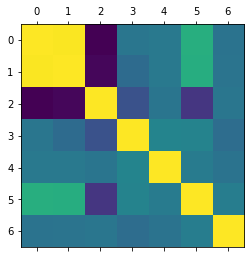

heatmap
AxesSubplot(0.125,0.125;0.62x0.755)
For different Theta values
for theta = 1
no of cols in test data =  7
predicted values
[ 8.04015181  6.75346197  6.19135824 ... 24.81338355 22.14794726
 21.4484078 ]
Mean Squared Error   0.940145077860296
R2 score   0.9908699279373638
Mean absolute error   0.790067120948586
MAPE =  49.072287981542075
no of cols in test data =  7
predicted values
[ 8.04015181  6.75346197  6.19135824 ... 24.81338355 22.14794726
 21.4484078 ]
Mean Squared Error   0.940145077860296
R2 score   0.9908699279373638
Mean absolute error   0.790067120948586
MAPE =  49.072287981542075
no of cols in test data =  7
predicted values
[ 8.04015181  6.75346197  6.19135824 ... 24.81338355 22.14794726
 21.4484078 ]
Mean Squared Error   0.940145077860296
R2 score   0.9908699279373638
Mean absolute error   0.790067120948586
MAPE =  49.072287981542075
for theta = 0
no of cols in test data =  7
predicted values
[ 8.0401518   6.75346196  6.19135824 ... 24.81338354 22.14794726
 21.448

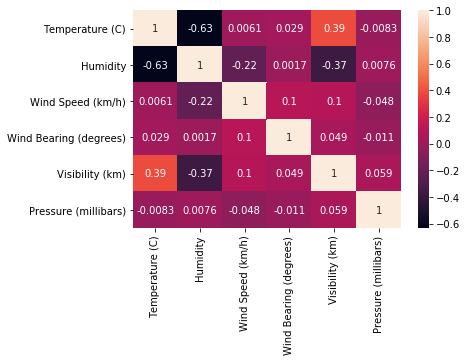

In [13]:
class Weather:

  def __init__(self):
    data = np.empty(2)
    labels = np.empty(1)
    theta = np.empty(1)


  def mean_absolute_percentage_error(self,true_labels, pred_labels):
    result= np.empty(true_labels.shape)
    for j in range(true_labels.shape[0]):
        if true_labels[j] == 0:
            val = pred_labels[j]/np.mean(true_labels)
            result[j]= val
#             result[j]=(validate_labels[j]-pred_val[j]) / validate_labels[j]
        else :
            diff = true_labels[j]-pred_labels[j]
            val=diff / true_labels[j]
            result[j] = val
#             result[j] = pred_val[j]/np.mean(validate_labels)
    abs_result = np.abs(result)
    m=np.mean(abs_result)*100
    return m
#     print("mean absolute error ",m)
  



  def calculate_means(self,data):
    means = [0 for row in range(len(data[0]))]
    for i in range(len(data[0])):
      values = [x[i] for x in data]
      means[i] = sum(values)/(float(len(data)))

    return means

  
  def calculate_std(self,data, means):
    stddev = [0 for row in range(len(data[0]))]
    for i in range(len(data[0])):
      values = [pow(x[i]-means[i],2) for x in data]
      stddev[i] = math.sqrt((sum(values)/ float(len(data)-1)))
    return stddev

  def standardize_data(self,data,means,stddev):
    for row in data:
      for i in range(len(data[0])):
        row[i] = (row[i] - means[i])/stddev[i]
    return data

  def fit_values(self, X, thetas, y_train, alpha, max_iterations):
    X_transposed = X
    # max_iterations = 5000
    # alpha = 0.005
    threshold = 0.0001
    for i in range(max_iterations):
      diff = np.dot(X_transposed, thetas) - y_train
      cost = sum(diff**2)
      gradient = np.dot(diff, X_transposed)
      value = (alpha*gradient)/float(len(X_transposed))
      thetas = thetas - value
    return thetas

  def predict_values(self,X):
      
      print("no of cols in test data = ", len(X[0]))
     
      y_pred = np.dot(X, self.theta)
      return y_pred

  def train(self,path):
    t_data = pd.read_csv(path)
    
    plt.matshow(t_data.corr())
    plt.show()

    cols = ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']
    t_data = t_data.drop(cols, axis = 1)
    self.labels = t_data['Apparent Temperature (C)'].to_numpy()
    t_data = t_data.drop('Apparent Temperature (C)', axis = 1)

    
    print("heatmap")
    ax = sns.heatmap(t_data.corr(), annot = True)
    print(ax)
    self.data = t_data.to_numpy()
    
    split_size = int(len(self.data)*0.2)
    
    train_size = len(self.data)-split_size
    means = self.calculate_means(self.data)
    stddev = self.calculate_std(self.data,means)
    self.data = self.standardize_data(self.data,means,stddev)
    


    #add a column of ones in the input dataset
    one = np.ones(len(self.data))
    new_input = np.concatenate((one[:, np.newaxis], self.data), axis=1)
    self.data = new_input
    
    # thetas = np.ones(len(new_input[0]))

    X_train = self.data[:69556,:]
    y_train =self.labels[:69556]
    X_test = self.data[69556:,:]
    y_test = self.labels[69556:]


    print("For different Theta values")
    mse_error = []
    # r2_error = []
    # mae_error = []
    mse_error_theta = []
    # r2_error_theta = []
    # mae_error_theta = []
    print("for theta = 1")
    iterations = [50,200,1000]
    for i in iterations :
      thetas = np.array([1,1,1,1,1,1,1])
      self.theta = self.fit_values(X_train, thetas,y_train, 0.005, 10000)
      
      y_pred = self.predict_values(X_test)
      print("predicted values")
      print(y_pred)
      mse_val = mean_squared_error(y_test, y_pred)
      mse_error_theta.append(mse_val)
      print("Mean Squared Error  ",mse_val)
      r2_val = r2_score(y_test, y_pred)
      # r2_error
      print("R2 score  " , r2_val)
      mae_val = mean_absolute_error(y_test,y_pred)
      print("Mean absolute error  ", mae_val)
      print("MAPE = ",self.mean_absolute_percentage_error(y_test,y_pred))
    mse_error.append(mse_error_theta)
    

    mse_error_theta = []
    # r2_error_theta = []
    # mae_error_theta = []
    print("for theta = 0")
    iterations = [50,200,1000]
    for i in iterations :
      thetas = np.array([0,0,0,0,0,0,0])
      self.theta = self.fit_values(X_train, thetas,y_train, 0.005, 10000)
      
      y_pred = self.predict_values(X_test)
      print("predicted values")
      print(y_pred)
      mse_val = mean_squared_error(y_test, y_pred)
      mse_error_theta.append(mse_val)
      print("Mean Squared Error  ",mse_val)
      r2_val = r2_score(y_test, y_pred)
      # r2_error
      print("R2 score  " , r2_val)
      mae_val = mean_absolute_error(y_test,y_pred)
      print("Mean absolute error  ", mae_val)
      print("MAPE = ",self.mean_absolute_percentage_error(y_test,y_pred))
    mse_error.append(mse_error_theta)


    mse_error_theta = []
    # r2_error_theta = []
    # mae_error_theta = []
    print("for theta = 50")
    iterations = [50,200,1000]
    for i in iterations :
      thetas = np.array([50,50,50,50,50,50,50])
      self.theta = self.fit_values(X_train, thetas,y_train, 0.005, 10000)
      
      y_pred = self.predict_values(X_test)
      print("predicted values")
      print(y_pred)
      mse_val = mean_squared_error(y_test, y_pred)
      mse_error_theta.append(mse_val)
      print("Mean Squared Error  ",mse_val)
      r2_val = r2_score(y_test, y_pred)
      # r2_error
      print("R2 score  " , r2_val)
      mae_val = mean_absolute_error(y_test,y_pred)
      print("Mean absolute error  ", mae_val)
      print("MAPE = ",self.mean_absolute_percentage_error(y_test,y_pred))
    mse_error.append(mse_error_theta)

    plt.plot(iterations,mse_error[0], linewidth = 2, markersize = 12 )
    plt.plot(iterations,mse_error[1], linewidth = 2, markersize = 12 )
    plt.plot(iterations,mse_error[2], linewidth = 2, markersize = 12 )


wr = Weather()
wr.train("/gdrive/My Drive/smai/assignment2/Datasets/Question-4/weather.csv")